# 含有单个连续型解释变量的模型

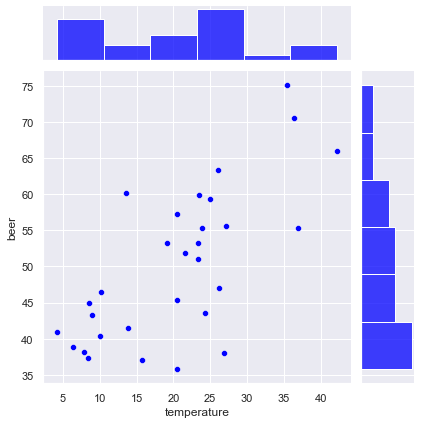

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# 用于统计模型的库，部分版本会报错
import statsmodels.formula.api as smf
import statsmodels.api as sm
# 设置浮点数打印精度
%precision 3
# 在Jupter Notebook中显示图形
%matplotlib inline
beer = pd.read_csv("./data/5-1-1-beer.csv")
beer.head()
sns.jointplot(x = "temperature", y = "beer",
              data = beer, color = "blue")

## 建模
啤酒销售额 ~ N(β₀ + β₁ X 气温, σ²)
建立一般的正态模型


In [2]:
# 使用statsmodels实现模型化
# 注意这个~符号
in_model = smf.ols(formula = "beer ~ temperature",data = beer).fit()

in_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Fri, 04 Mar 2022   Prob (F-statistic):           1.11e-05
Time:                        16:22:41   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 使用AIC进行模型选择
ols(最小二乘法)

In [3]:
null_model = smf.ols("beer ~ 1", data = beer).fit()
null_model.aic
in_model.aic

# 含有解释变量的模型的AIC更小
in_model.llf

# 解释变量个数
in_model.df_model

# 最终的AIC计算如下:
-2 * (in_model.llf - (in_model.df_model + 1))



208.90902935575437

### 回归直线
模型预测的响应变脸的图形就是回归直线


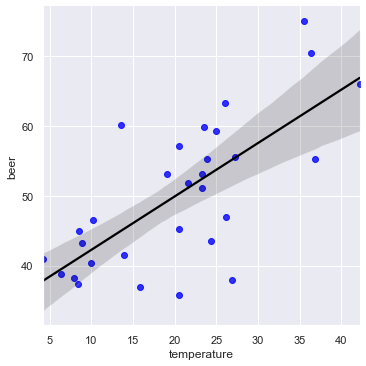

In [4]:
sns.lmplot(x = "temperature", y = "beer", data = beer, scatter_kws = {"color":"blue"},
                line_kws = {"color":"black"})


### 使用模型进行预测


In [5]:
in_model.predict()
in_model.predict(pd.DataFrame({"temperature":[0]}))

# 参数
in_model.params
# 气温20摄氏度的期望
in_model.predict(pd.DataFrame({"temperature":[20]}))

beta0 = in_model.params[0]
beta1 = in_model.params[1]

temperature = 20
beta0 + beta1 + temperature


55.375642843501936

### 获取残差

In [6]:
resid = in_model.resid
print(resid.head(3))

y_hat = beta0 + beta1 * beer["temperature"]
y_hat.head(3)
print((beer.beer - y_hat).head(3))

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64
0   -5.001481
1    5.554095
2   -1.864491
dtype: float64


### 决定系数

In [7]:
mu = np.mean(beer.beer)
y = beer.beer
yhat = in_model.predict()

(np.sum(yhat - mu) ** 2 ) / np.sum((y - mu) ** 2)
# 也可以通过下面语句
in_model.rsquared

# 首先，计算模型可以预测差异与模型不可预测都残差平方和的总和
temp = np.sum((yhat - mu)**2) + sum(resid**2)
temp
np.sum((y - mu)**2)

1 - np.sum(resid**2) / np.sum((y - mu)**2)

0.5039593230611858

### 修正系数

In [8]:
# 通过自由度来考虑决定系数
n = len(beer.beer)
s = 1
1 - ((np.sum(resid**2) / (n - s - 1)) /
     (np.sum((y - mu)**2) / (n - 1)))

# 也可以通过下面的语句
in_model.rsquared_adj

0.48624358459908534

C:\Users\Cherry\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


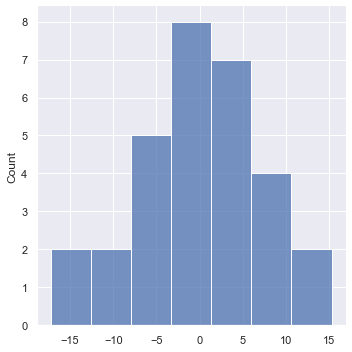

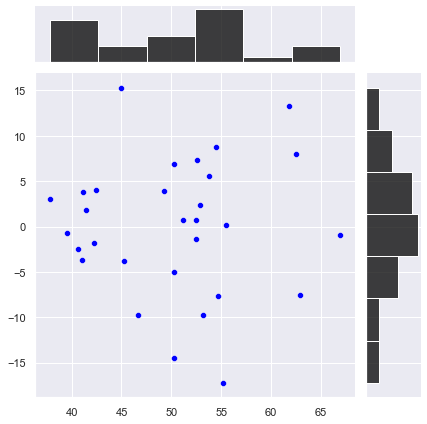

In [9]:
sns.displot(resid)

sns.jointplot(in_model.fittedvalues, resid,
              joint_kws={"color":"blue"},
              marginal_kws={"color":"black"})

### 分位图
分位图是用来比较理论分位数(theoretical quantiles)与实际分位数(sample quantiles)的散点图，也叫Q~Q图🦝。
Q是Quantile的缩写

C:\Users\Cherry\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


array([-1.849, -1.518, -1.3  , -1.131, -0.989, -0.865, -0.753, -0.649,
       -0.552, -0.46 , -0.372, -0.287, -0.204, -0.122, -0.04 ,  0.04 ,
        0.122,  0.204,  0.287,  0.372,  0.46 ,  0.552,  0.649,  0.753,
        0.865,  0.989,  1.131,  1.3  ,  1.518,  1.849])

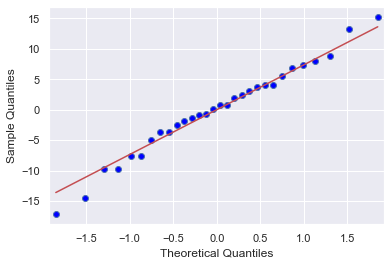

In [10]:
fig = sm.qqplot(resid, line = "s")
resid_sort = resid.sort_values()
resid_sort.head()

# 这里可以看到分位图的
nobs = len(resid_sort)
cdf = np.arange(1, nobs + 1) / (nobs + 1)
cdf
ppf = stats.norm.ppf(cdf)
ppf


## 方差分析
方差分析是来检验均值差的方法

### 多重假设检验
反复检验导致结果更容易出现问题的叫做`多重假设检验`问题

### 方差分析的直观理解:F比
方差分析的英文名(ANalysis Of VAriance)

F比 = 效应的方差 / 误差的方差

### 方差分析的直观理解
一般的方差分析其实通过看图就可以明白一二


   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny
         beer
weather      
cloudy      7
rainy       3
sunny      11


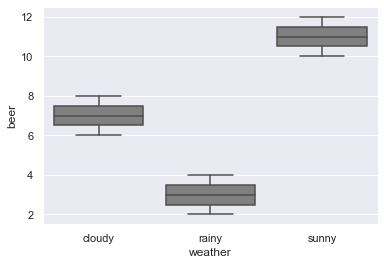

In [11]:
import numpy as np
import pandas as pd
from scipy import stats

# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
# 用于估计统计模型的库（部分版本会报出警告信息）
import statsmodels.formula.api as smf
import statsmodels.api as sm
# 设置浮点数打印精度
%precision 3
# 在Jupyter Notebook中显示图形
%matplotlib inline

# 定义一组数据
weather = [
    "cloudy", "cloudy",
    "rainy", "rainy",
    "sunny", "sunny"
]

beer = [6, 8, 2, 4, 10, 12]

# 转换成数据帧
weather_beer = pd.DataFrame({
    "beer"  : beer,
    "weather": weather
})
print(weather_beer)

# 样本量很小所以绘制箱形图而非小提琴图
sns.boxplot(x = "weather", y = "beer",
            data = weather_beer, color = "gray")

print(weather_beer.groupby("weather").mean())

#### 方差分析：计算组间偏差平方和与组内偏差平方和
分布手动实现单因素方差分析

In [12]:
# 天气的影响
effect = [7, 7, 3, 3, 11, 11]

# 组间偏差平方和
mu_effect = sp.mean(effect)
squares_model = sp.sum((effect - mu_effect) ** 2)
print(squares_model)

resid = weather_beer.beer - effect
print(resid)

# 组内偏差平方和
squares_resid = sp.sum(resid ** 2)
print(squares_resid)

64.0
0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64
6


C:\Users\Cherry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  """
C:\Users\Cherry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  
C:\Users\Cherry\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:13: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  del sys.path[0]


#### 方差分析：计算组间方差与组内方差
样本方差和无偏方差是有一定的区别的

组间差异的自由度取决于水平数量。
组内差异的自由度取决于样本容量和水平数量。
反正看推导就知道啦

In [13]:
df_model = 2 # 组间差异的自由度
df_resid = 3 # 组内差异的自由度

# 组内方差
variance_model = squares_model / df_model
print(variance_model)

# 组间方差
variance_resid = squares_resid / df_resid
print(variance_resid)

32.0
2.0


#### 方差分析：计算p值


In [14]:
f_ratio = variance_model / variance_resid
print(f_ratio)

# 通过sp.stats.f.cdf函数使用F分布的累计分布函数计算p值
# 参数为F比的值和2个自由度
1 - sp.stats.f.cdf(x = f_ratio, dfn = df_model, dfd = df_resid)


16.0


0.02509457330439091

### 使用statsmodels的方差分析


In [15]:
# 使用正态线性模型，进行单因素方差分析
anova_model = smf.ols("beer ~ weather",
                      data = weather_beer).fit()
print(sm.stats.anova_lm(anova_model, type = 2))

# 打印已估计模型的参数
anova_model.params



           df  sum_sq  mean_sq     F    PR(>F)
weather   2.0    64.0     32.0  16.0  0.025095
Residual  3.0     6.0      2.0   NaN       NaN


Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

### 回归模型中的方差分析

In [16]:
# 正态线性模型中广泛地应用了方差分析。
# 当解释变量为连续变量时，方差分析依然有效

# 读取数据
beer = pd.read_csv("data/5-1-1-beer.csv")
# 估计模型
lm_model = smf.ols(formula = "beer ~ temperature",
                   data = beer).fit()


In [ ]:
# 与解释变量为分类变量的模型类似，
# 我们可以用模型的拟合值与残差计算F比
df_lm_model = 1      #模型自由度
df_lm_resid = 28    #残差自由度

# 拟合值
lm_effect = lm_model.fittedvalues
# 残差
lm_resid = lm_model.resid
# 气温的影响大小
mu = sp.mean(lm_effect)
squares_lm_model = sp.sum(lm_effect)
variance_lm_model = squares_lm_model / df_lm_model
# 残差大小
squares_lm_resid = sp.sum((lm_resid) ** 2)
variance_lm_resid = squares_lm_resid / df_lm_resid

# F比
f_value_lm = variance_lm_model / variance_lm_resid
print(f_value_lm)

lm_model.summary()

### 含有多个解释变量的模型

   humidity  price  sales  temperature weather
0      29.5    290  229.7         17.8   rainy
1      38.1    290  206.1         26.1   rainy
2      31.5    290  202.5         22.0   rainy


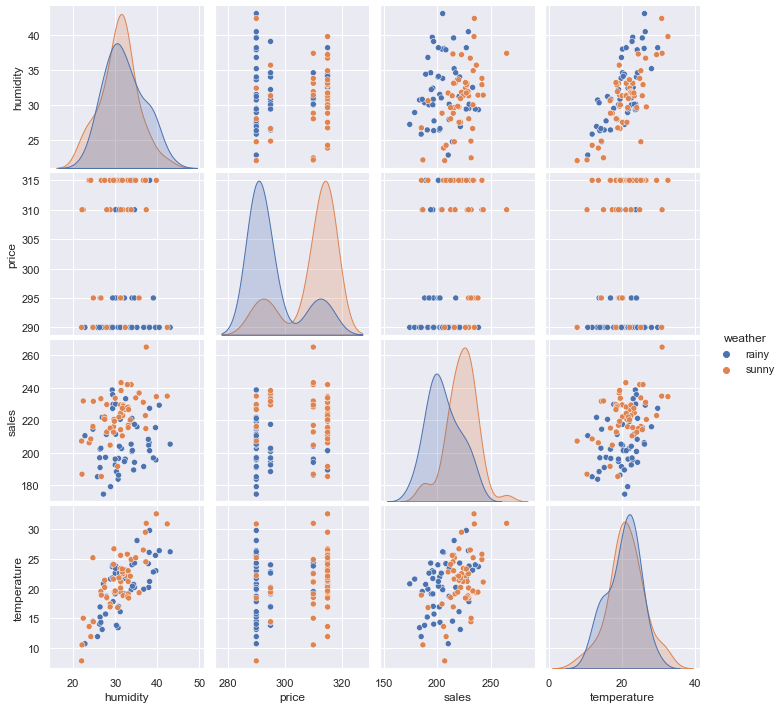

In [26]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
# 用于统计模型的库（部分版本会报出警告信息）
import statsmodels.formula.api as smf
import statsmodels.api as sm
# 设置浮点数精度
%precision 3
# 在Jupter Notebook中显示图形
%matplotlib inline

sales = pd.read_csv("data/5-3-1-lm-model.csv")
print(sales.head(3))

# 湿度、价格、销售额、气温在不同天气下的散点图
sns.pairplot(data = sales, hue = "weather")

### 分析变量之间的关系
对于需要多个解释变脸的模型，需要看清变量之间的关系

         humidity  price    sales  temperature
weather                                       
rainy      32.126  295.5  205.924       20.422
sunny      30.852  309.5  222.718       21.102


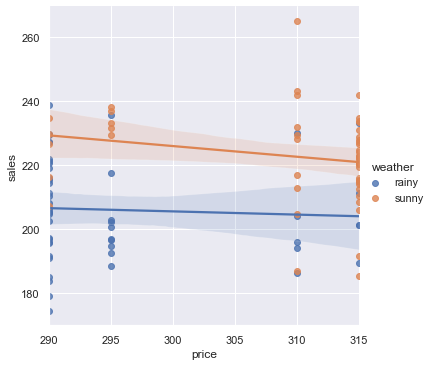

In [28]:
print(sales.groupby("weather").mean())
sns.lmplot(x = "price", y = "sales", data = sales, hue = "weather")

### 多解释变量的模型

In [32]:
# 估计多解释变量的模型
# 在定义多解释变量的模型时，解释变量之间用加号 （+） 连接
lm_sales = smf.ols("sales ~ weather + humidity + temperature + price",
                   data=sales).fit()
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

### 错误的分析：使用普通方差分析
    使用检验来判断解释变量是否会显著影响响应变量。
这里如果使用普通的方差分析，就会出现问题。
这种方差分析也叫 Type I ANOVA


In [33]:
print(sm.stats.anova_lm(lm_sales, typ=1).round(3))


               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
humidity      1.0   1779.601  1779.601   9.805   0.002
temperature   1.0   2076.845  2076.845  11.443   0.001
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


In [37]:
# 改变解释变量的顺序
lm_sales_2 = smf.ols(
    "sales ~ weather + temperature + humidity + price",
    data=sales
).fit()
# 检验结果
print(sm.stats.anova_lm(lm_sales_2, typ=1).round(3))

# 变量只改变了位置，参数都没变，但是检验结果却变了。
# 第二个模型中的湿度的p值约为0.6, 被认为不存在显著影响。

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
temperature   1.0   3814.779  3814.779  21.018   0.000
humidity      1.0     41.667    41.667   0.230   0.633
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


### 回归系数的t检验


In [39]:
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [40]:
# 修改变量顺序，再试一次
lm_sales_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


在两次检验中，湿度的回归系数p值都是0.587


### 多重假设问题的处理
Type II ANOVA 是方差分析的一种，它的结果不会因解释变量的顺序的不同而不同。
虽然依然按照严密的试验方案得到的数据受Type I ANOVA中问题的影响不大，但这次的例子更适合Type II ANOVA
